In [3]:
import pandas as pd

#Load dataset
file_path = 'C:/Users/mjlri/Downloads/cleaned_case_study_gentoo.csv'
data = pd.read_csv(file_path)
data.head()

#Display the first few rows
data.head()

,id,date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307,1210,13,1,4981
1,2,2021-02-01,facebook_tier2,social,348934,220688,16300,1640,48,3,14962
2,3,2021-02-01,google_hot,search,89459845,22850,5222,457,9,1,7981
3,4,2021-02-01,google_wide,search,127823,147038,6037,1196,24,1,2114
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962,2258,49,10,84490


In [4]:
#Information datset (column names, data types, non-null counts)
data.info()

# Check for missing values in each column
data.isnull().sum()

# Display basic statistics (mean, standard deviation, min, max) for numerical columns
data.describe()

# Display the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             616 non-null    int64 
 1   date           616 non-null    object
 2   campaign_name  616 non-null    object
 3   category       616 non-null    object
 4   campaign_id    616 non-null    int64 
 5   impressions    616 non-null    int64 
 6   mark_spent     616 non-null    int64 
 7   clicks         616 non-null    int64 
 8   leads          616 non-null    int64 
 9   orders         616 non-null    int64 
 10  revenue        616 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 53.1+ KB


,id,date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307,1210,13,1,4981
1,2,2021-02-01,facebook_tier2,social,348934,220688,16300,1640,48,3,14962
2,3,2021-02-01,google_hot,search,89459845,22850,5222,457,9,1,7981
3,4,2021-02-01,google_wide,search,127823,147038,6037,1196,24,1,2114
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962,2258,49,10,84490


In [5]:
#Create new calculated features: Return on Investment, Cost per lead and conversion rate

# Create ROI (Return on Investment) column
data['ROI'] = (data['revenue'] - data['mark_spent']) / data['mark_spent']

# Create Cost Per Lead column
data['cost_per_lead'] = data['mark_spent'] / data['leads']

# Create Conversion Rate column
data['conversion_rate'] = data['orders'] / data['clicks']

# Check the updated dataset
data.head()

,id,date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue,ROI,cost_per_lead,conversion_rate
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307,1210,13,1,4981,-0.318325,562.076923,0.000826
1,2,2021-02-01,facebook_tier2,social,348934,220688,16300,1640,48,3,14962,-0.082086,339.583333,0.001829
2,3,2021-02-01,google_hot,search,89459845,22850,5222,457,9,1,7981,0.528342,580.222222,0.002188
3,4,2021-02-01,google_wide,search,127823,147038,6037,1196,24,1,2114,-0.649826,251.541667,0.000836
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962,2258,49,10,84490,1.819905,611.469388,0.004429


In [8]:
#Save new dataset with new changes
data.to_csv('cleaned_case_study_gentoo_processed.csv', index=False)

In [9]:
#Fixing CSV file

# Load the CSV file
data = pd.read_csv('cleaned_case_study_gentoo_processed.csv')

# Check for any NaN values, data types, and a preview of the data
print(data.info())  # Overview of columns and types
print(data.head())  # Check the first few rows

# Check for any missing or null values
print(data.isnull().sum())

# Check for special characters or anomalies in the dataset
print(data.describe(include='all'))  # Provides summary for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               616 non-null    int64  
 1   date             616 non-null    object 
 2   campaign_name    616 non-null    object 
 3   category         616 non-null    object 
 4   campaign_id      616 non-null    int64  
 5   impressions      616 non-null    int64  
 6   mark_spent       616 non-null    int64  
 7   clicks           616 non-null    int64  
 8   leads            616 non-null    int64  
 9   orders           616 non-null    int64  
 10  revenue          616 non-null    int64  
 11  ROI              616 non-null    float64
 12  cost_per_lead    616 non-null    float64
 13  conversion_rate  616 non-null    float64
dtypes: float64(3), int64(8), object(3)
memory usage: 67.5+ KB
None
   id        date    campaign_name    category  campaign_id  impressions  \
0   1  2021-02-

c:\Users\mjlri\miniconda3\envs\gentoo_pdf\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [10]:
#Clean the Data
# Fix typos or special characters in the campaign_name column
data['campaign_name'] = data['campaign_name'].str.replace(',', '_')

# Handling missing values by replacing them with 0 or another value
data.fillna(0, inplace=True)

# Convert numerical columns to the correct type
numerical_columns = ['impressions', 'clicks', 'leads', 'orders', 'revenue', 'ROI', 'cost_per_lead', 'conversion_rate']
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Ensure no negative values for columns where it doesn't make sense (e.g., leads, orders)
data[numerical_columns] = data[numerical_columns].applymap(lambda x: x if x >= 0 else 0)

print(data.head())  # Recheck the cleaned dataset

   id        date    campaign_name    category  campaign_id  impressions  \
0   1  2021-02-01   facebook_tier1      social       349043       148263   
1   2  2021-02-01   facebook_tier2      social       348934       220688   
2   3  2021-02-01       google_hot      search     89459845        22850   
3   4  2021-02-01      google_wide      search       127823       147038   
4   5  2021-02-01  youtube_blogger  influencer        10934       225800   

   mark_spent  clicks  leads  orders  revenue       ROI  cost_per_lead  \
0        7307    1210     13       1     4981  0.000000     562.076923   
1       16300    1640     48       3    14962  0.000000     339.583333   
2        5222     457      9       1     7981  0.528342     580.222222   
3        6037    1196     24       1     2114  0.000000     251.541667   
4       29962    2258     49      10    84490  1.819905     611.469388   

   conversion_rate  
0         0.000826  
1         0.001829  
2         0.002188  
3         0.00

C:\Users\mjlri\AppData\Local\Temp\ipykernel_21344\3312634923.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[numerical_columns] = data[numerical_columns].applymap(lambda x: x if x >= 0 else 0)


In [11]:
#Handle infinite values in cost_per_lead
import numpy as np

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

#Replace NaNs with 0 or another value 
data.fillna(0, inplace=True)

In [12]:
#Date Column Formatting: date column is in object format
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Double-check the conversion
print(data['date'].head())

0   2021-02-01
1   2021-02-01
2   2021-02-01
3   2021-02-01
4   2021-02-01
Name: date, dtype: datetime64[ns]


In [13]:
#Review dataset
print(data.info())  # Confirm the data types again
print(data.describe())  # Re-check statistics after the cleaning


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               616 non-null    int64         
 1   date             616 non-null    datetime64[ns]
 2   campaign_name    616 non-null    object        
 3   category         616 non-null    object        
 4   campaign_id      616 non-null    int64         
 5   impressions      616 non-null    int64         
 6   mark_spent       616 non-null    int64         
 7   clicks           616 non-null    int64         
 8   leads            616 non-null    int64         
 9   orders           616 non-null    int64         
 10  revenue          616 non-null    int64         
 11  ROI              616 non-null    float64       
 12  cost_per_lead    616 non-null    float64       
 13  conversion_rate  616 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(8)

In [14]:
#review NaN values..# Check for NaN values
print(data.isna().sum())

id                 0
date               0
campaign_name      0
category           0
campaign_id        0
impressions        0
mark_spent         0
clicks             0
leads              0
orders             0
revenue            0
ROI                0
cost_per_lead      0
conversion_rate    0
dtype: int64


In [20]:
pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 10.0 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 9.8 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 10.0 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 9.0 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


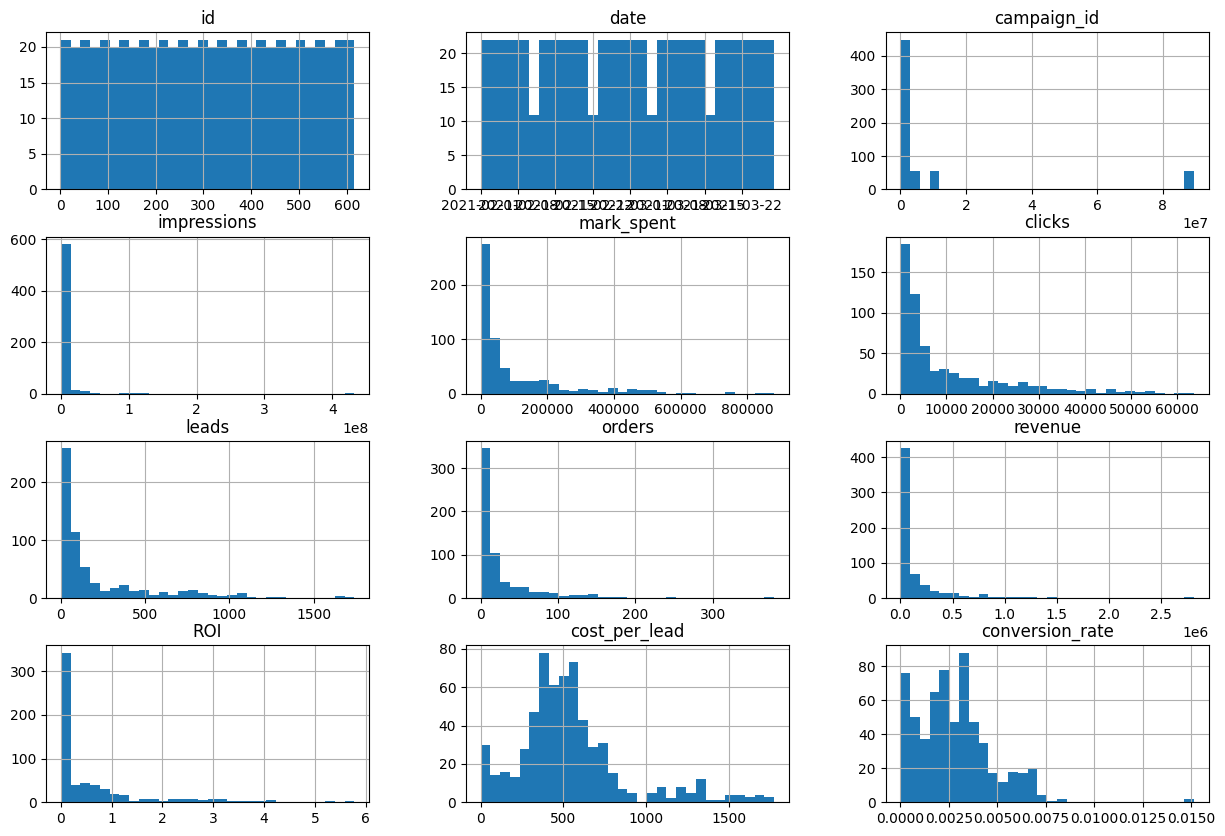

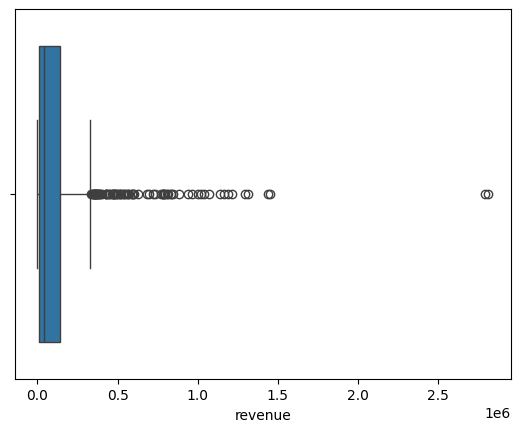

In [22]:
import pandas as pd
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns
#EDA:Visual distributions 
# Visualize distributions of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplot of revenue
sns.boxplot(x=data['revenue'])
plt.show()


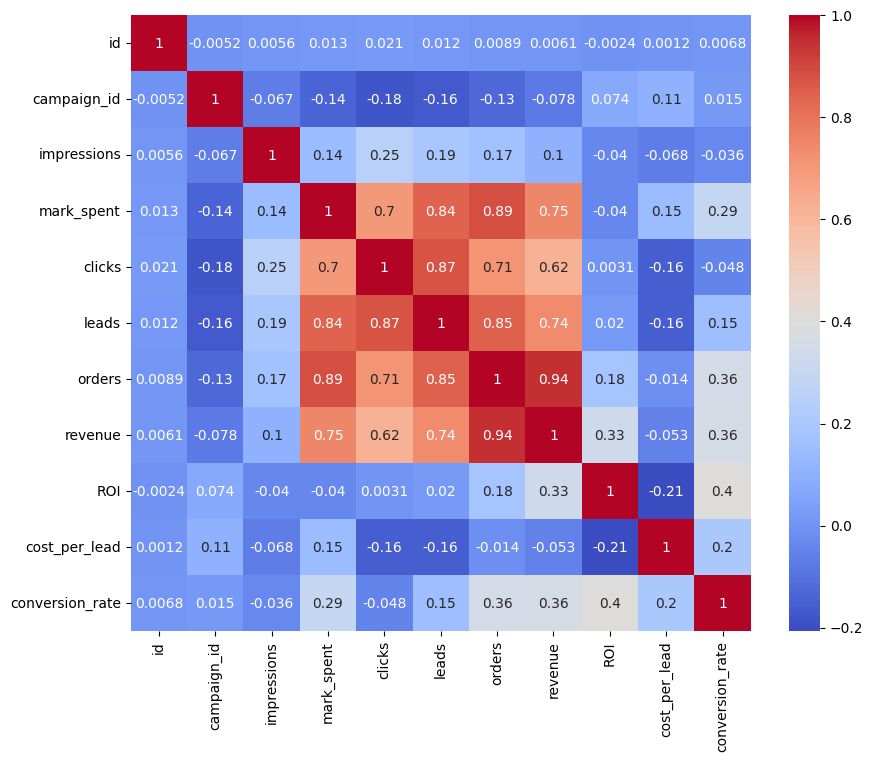

In [26]:
#Filter numeric columns before calculating correlations matrix
# Filter numeric columns from the data
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Check for correlations (this will now only include numeric data)
corr_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [28]:
#Feature engineering: Extra features 

#Conversion rate (leads/clicks)
data['conversion_rate'] = (data['leads'] / data['clicks']) * 100

#Return on Ad Spend (ROAS)
data['roas'] = data['revenue'] / data['mark_spent']

#Engagement rate (Clicks/Impressions)
data['engagement_rate'] = (data['clicks'] / data['impressions']) * 100

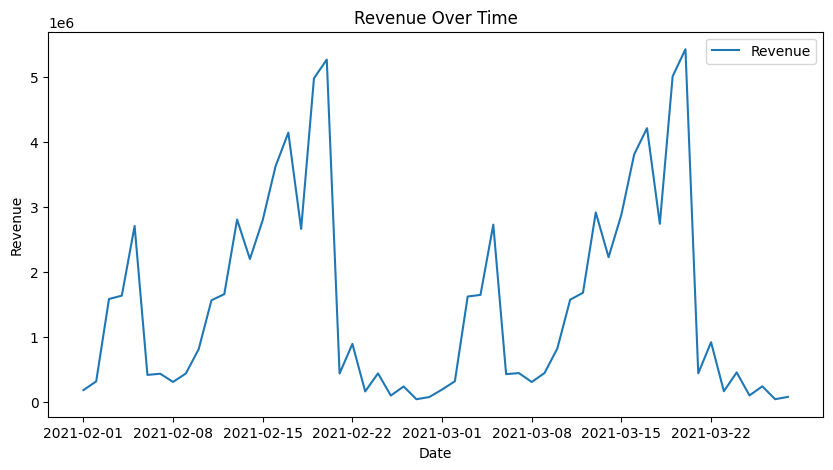

In [30]:
#Trends over time
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Group by date and sum the values
trends = data.groupby('date').sum()

# Plotting revenue trends over time
plt.figure(figsize=(10, 5))
plt.plot(trends.index, trends['revenue'], label='Revenue')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()